# VSWR Circles

This notebook demonstrates plotting VSWR (Voltage Standing Wave Ratio) circles on a Smith chart using the `pysmithchart` library.

- **Z-Parameters:** Direct plotting of impedance data.
- **S-Parameters:** Using scattering parameters (with the help of a custom calculation via `calc_gamma`).
- **Y-Parameters:** Plotting using normalized admittances.
- **Mixed-Parameters:** Combining S- and Y-parameters in one plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pysmithchart import S_PARAMETER, Y_PARAMETER
from pysmithchart.utils import calc_gamma, calc_load

%config InlineBackend.figure_format = 'retina'

### VSWR Circle Using Z-Parameters

This example creates a VSWR circle by computing the impedance values directly from the reflection coefficient. It then plots the circle along with three sample points using Z-parameters.

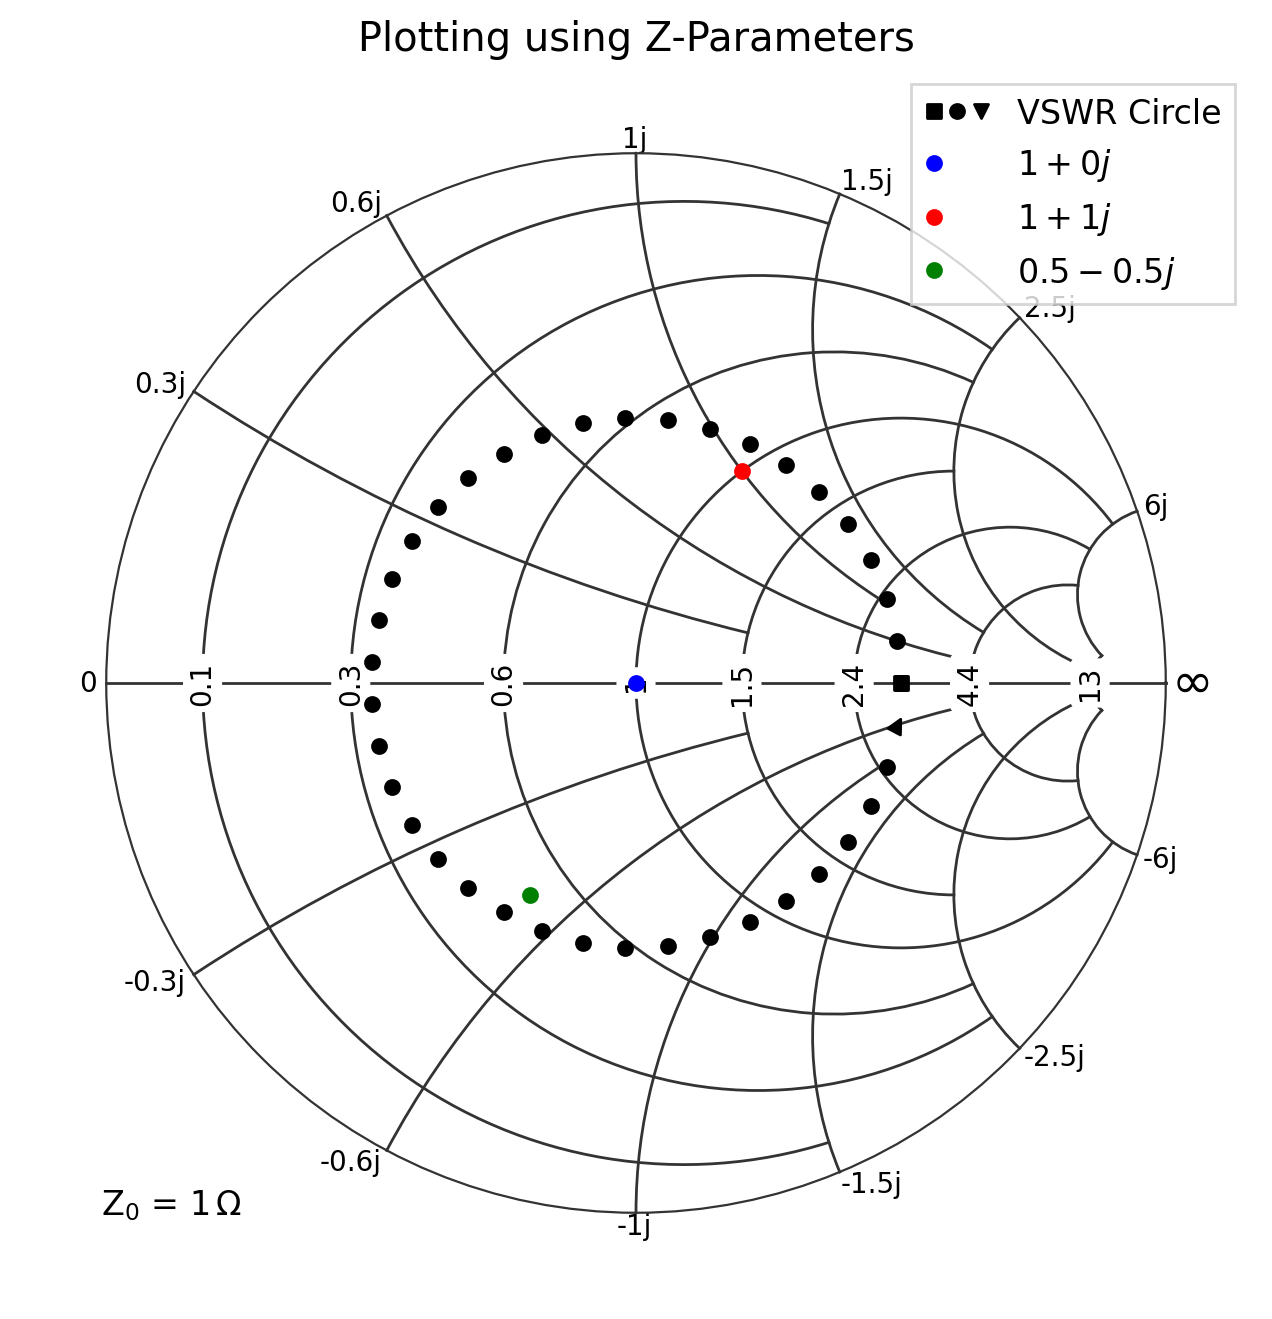

In [16]:
Gamma = 0.5 * np.exp(2j * np.pi * np.linspace(0, 1, 40))
ZL = -(Gamma + 1) / (Gamma - 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1, projection="smith", axes_impedance=1)

plt.plot(ZL[:-1], "k", ls="", markersize=14, label="VSWR Circle")
plt.plot(1 + 0j, "b", markersize=14, label="$1+0j$")
plt.plot(1 + 1j, "r", markersize=14, label="$1+1j$")
plt.plot(0.5 - 0.5j, "g", markersize=14, label="$0.5-0.5j$")

plt.title("Plotting using Z-Parameters")
plt.legend()
plt.show()

### VSWR Circle Using S-Parameters

In this example the VSWR circle is plotted using S-parameters. A reference impedance of 50 Ω is used, and the helper function `calc_gamma` is applied to convert load impedances into their corresponding reflection (i.e., scattering) coefficients.

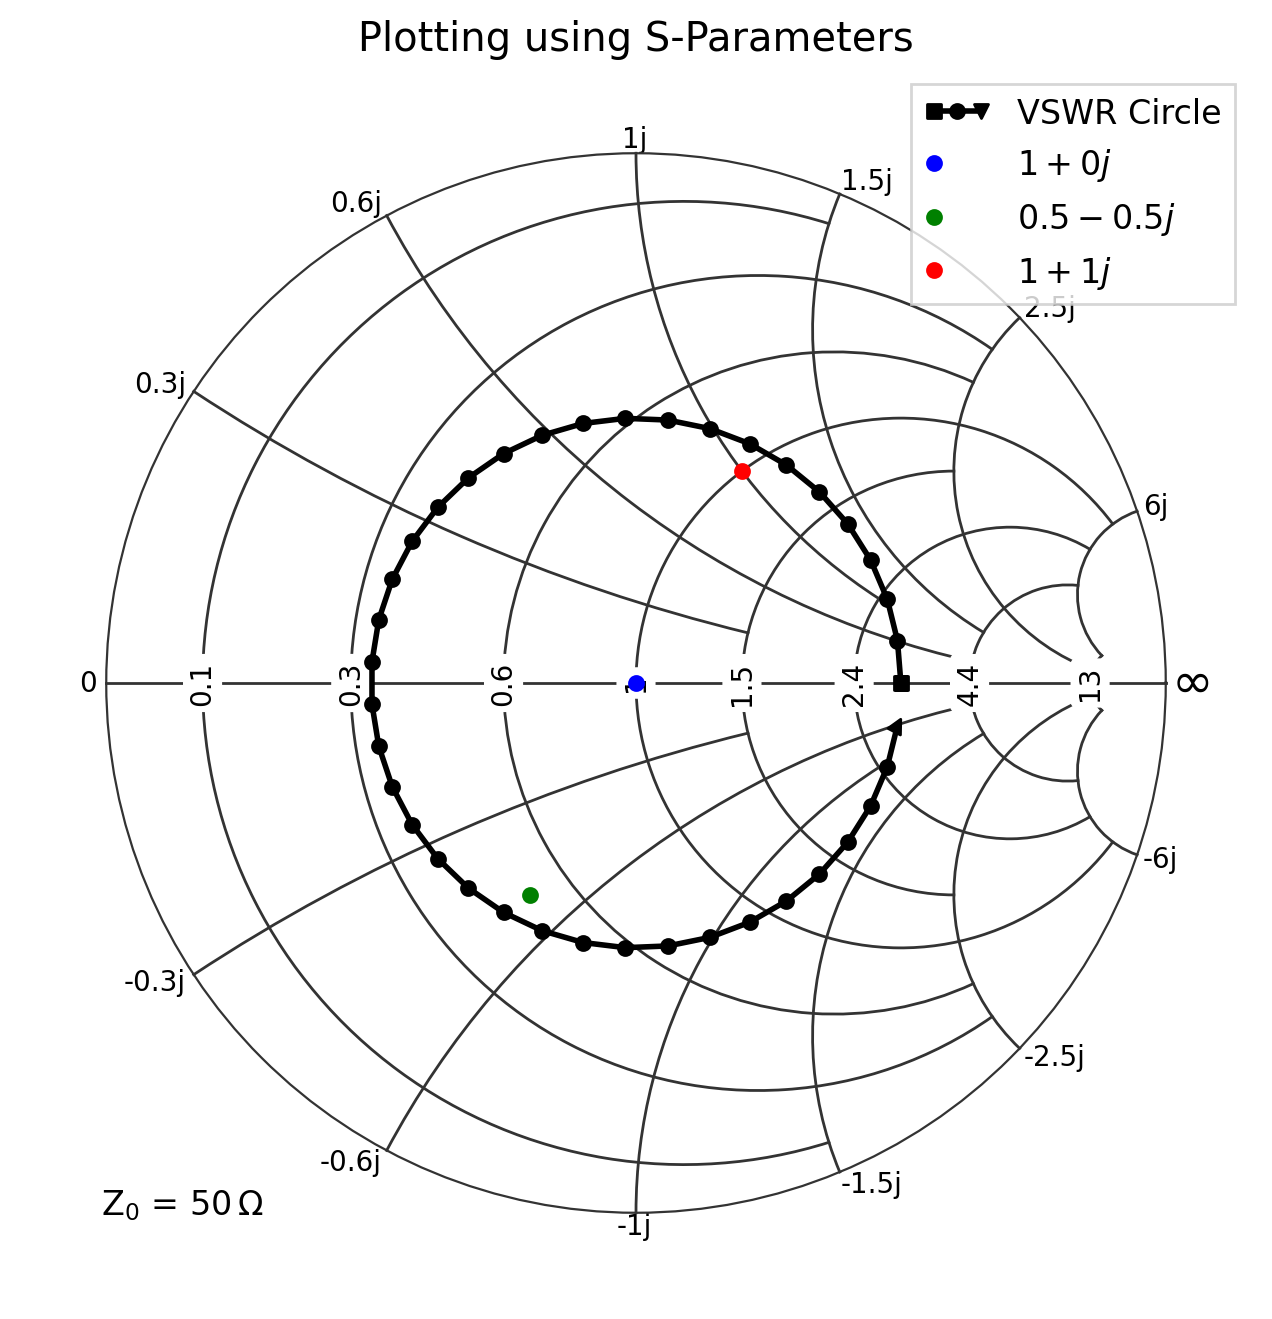

In [10]:
Z0 = 50

plt.subplots(figsize=(8, 8), subplot_kw={"projection": "smith"})

# Plot the base VSWR circle
Gamma = 0.5 * np.exp(2j * np.pi * np.linspace(0, 1, 40))
plt.plot(Gamma[:-1], "k", datatype=S_PARAMETER, markersize=14, label="VSWR Circle")

# Plot sample points
ZL = Z0 * (1 + 0j)
Gamma_pt = calc_gamma(Z0, ZL)
plt.plot(Gamma_pt, "b", datatype=S_PARAMETER, markersize=14, marker="o", label="$1+0j$")

ZL = Z0 * (0.5 - 0.5j)
Gamma_pt = calc_gamma(Z0, ZL)
plt.plot(Gamma_pt, "g", datatype=S_PARAMETER, markersize=14, marker="o", label="$0.5-0.5j$")

ZL = Z0 * (1 + 1j)
Gamma_pt = calc_gamma(Z0, ZL)
plt.plot(Gamma_pt, "r", datatype=S_PARAMETER, markersize=14, marker="o", label="$1+1j$")

plt.title("Plotting using S-Parameters")
plt.legend()
plt.show()

### VSWR Circle Using Y-Parameters

This example plots the VSWR circle using normalized admittances (Y-parameters). Here the load impedance is first computed using `calc_load` and then converted to admittance. Sample points are then plotted as normalized admittances.

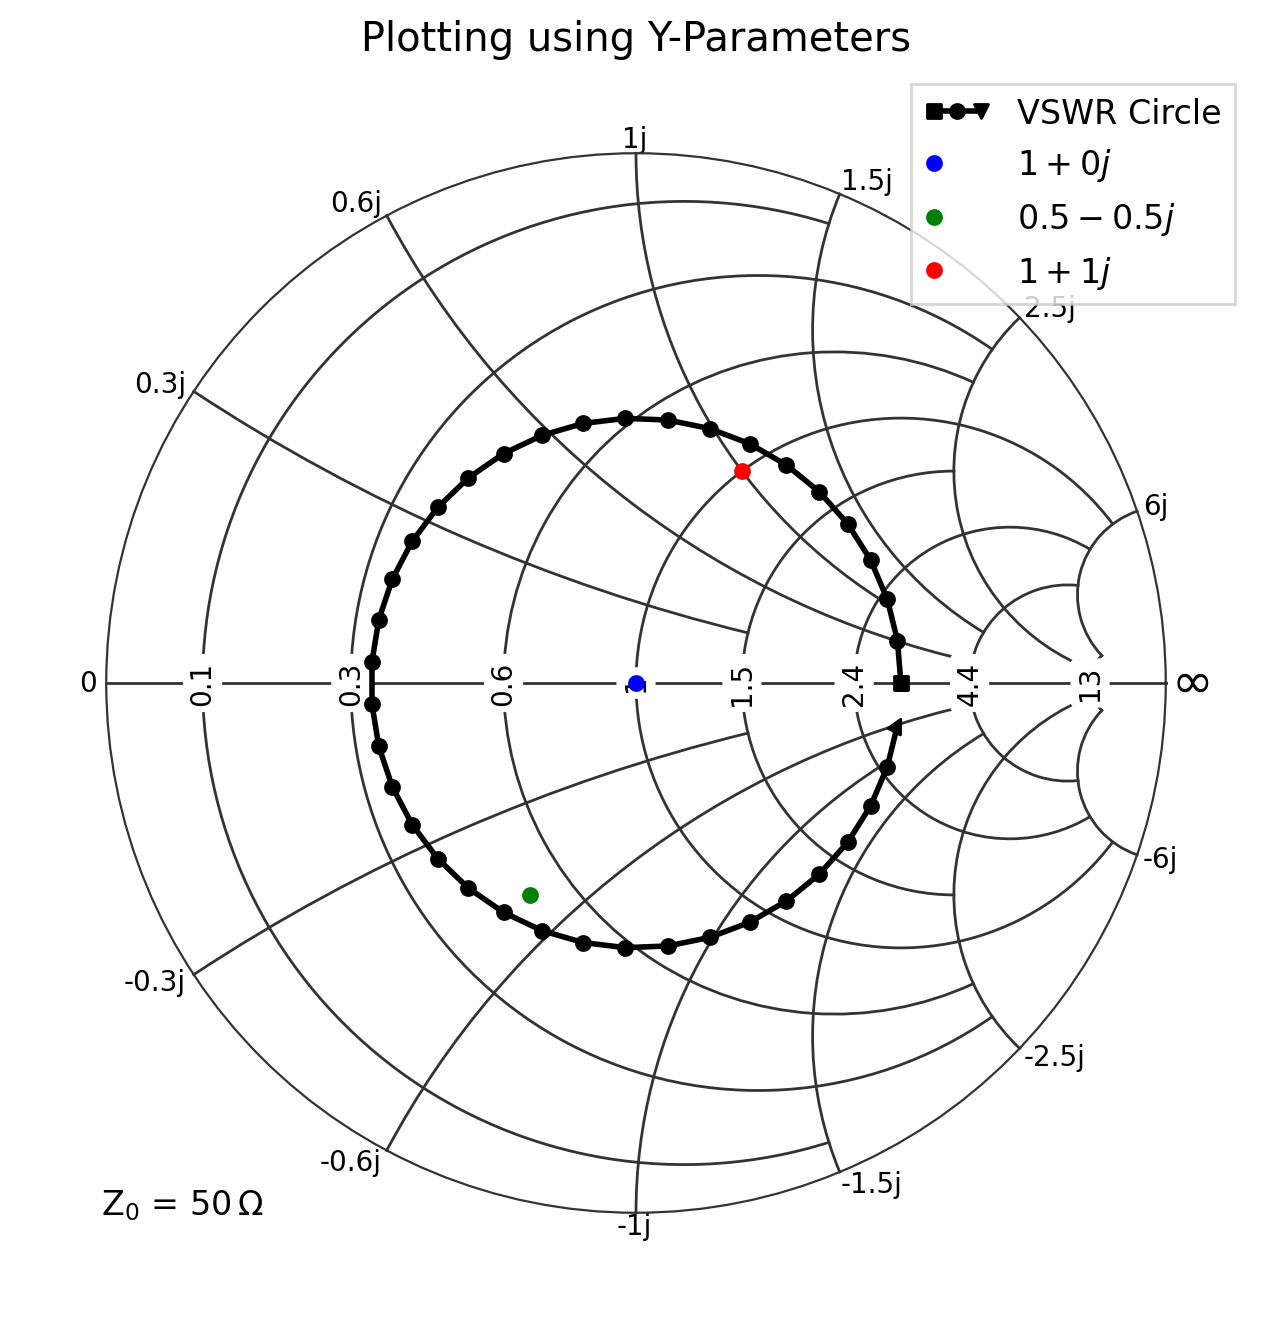

In [14]:
Z0 = 1

plt.subplots(figsize=(8, 8), subplot_kw={"projection": "smith"})

# Compute the VSWR circle in admittance domain
Gamma = 0.5 * np.exp(2j * np.pi * np.linspace(0, 1, 40))
ZL = calc_load(Z0, Gamma)  # normalized impedance

YL = 1 / ZL
plt.plot(YL[:-1], "k", datatype=Y_PARAMETER, markersize=14, label="VSWR Circle")

# Plot sample points
ZL = 1 + 0j
YL = 1 / ZL
plt.plot(YL, "b", datatype=Y_PARAMETER, markersize=14, label="$1+0j$")

ZL = 0.5 - 0.5j
YL = 1 / ZL
plt.plot(YL, "g", datatype=Y_PARAMETER, markersize=14, label="$0.5-0.5j$")

ZL = 1 + 1j
YL = 1 / ZL
plt.plot(YL, "r", datatype=Y_PARAMETER, markersize=14, label="$1+1j$")

plt.title("Plotting using Y-Parameters")
plt.legend()
plt.show()

### VSWR Circle Using Mixed-Parameters

In this final example the VSWR circle is plotted using a mix of S- and Y-parameters. The base circle is drawn using S-parameters while one of the sample points is plotted using Y-parameters. This demonstrates how different data representations can be combined on the same Smith chart.

Note: The axes impedance is set to 1 so that the normalization is appropriate.

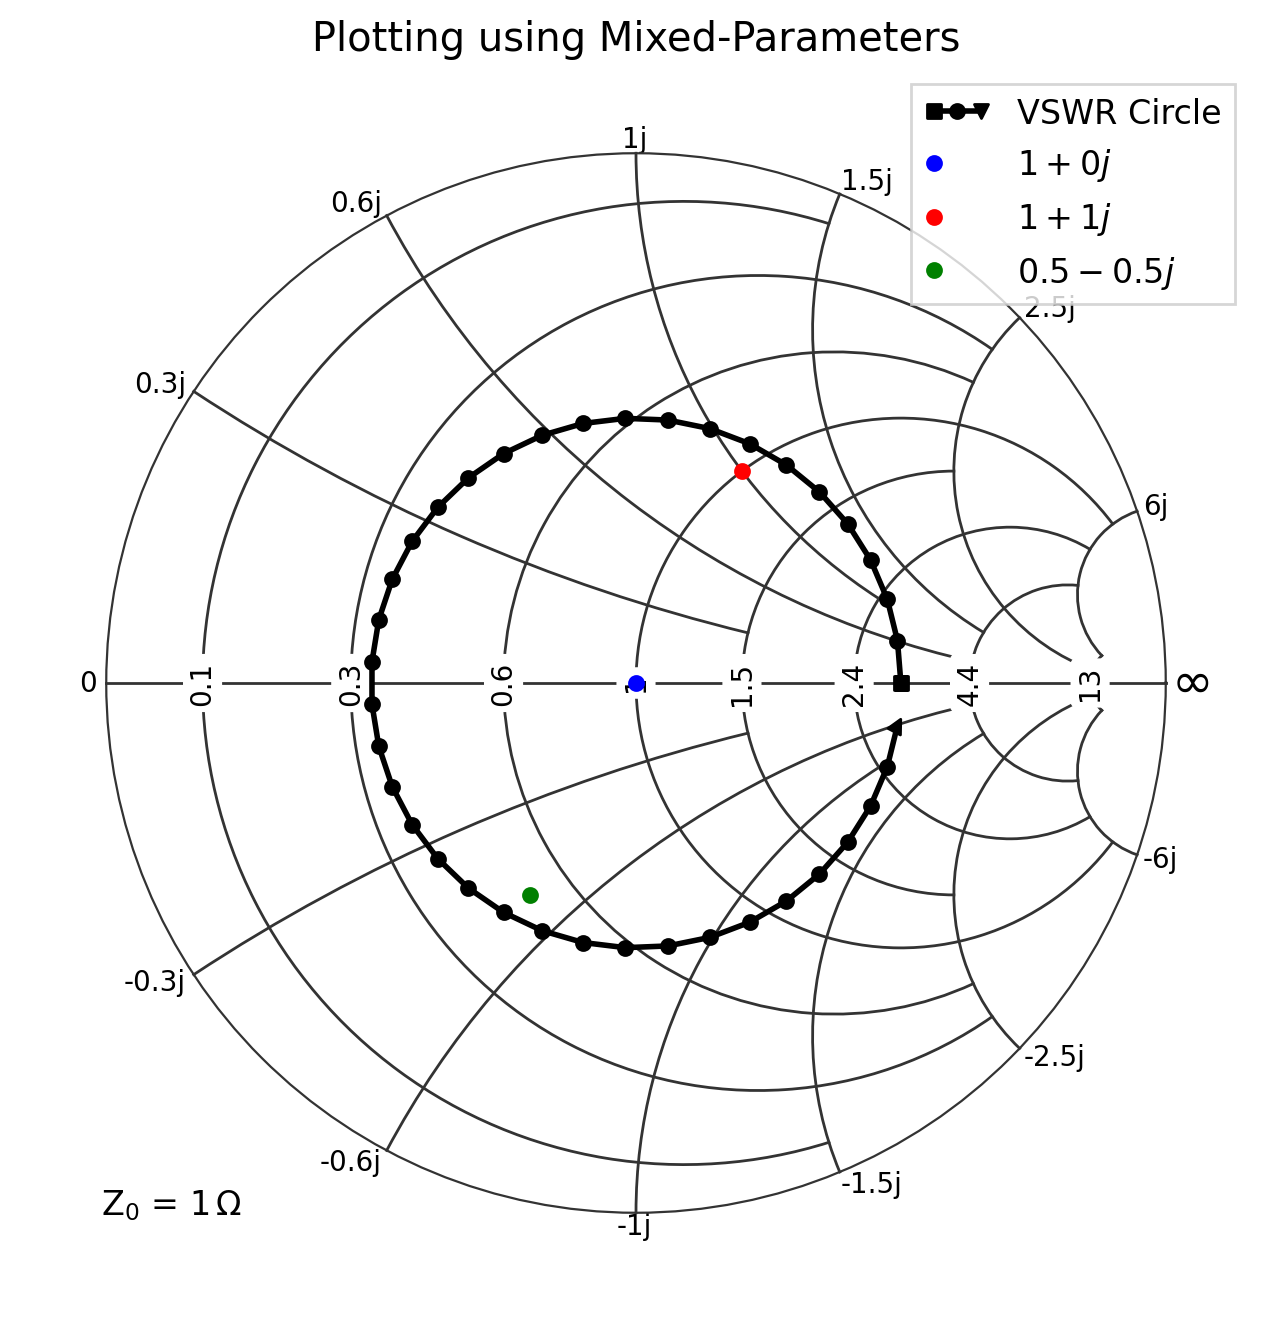

In [20]:
Gamma = 0.5 * np.exp(2j * np.pi * np.linspace(0, 1, 40))

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1, projection="smith", axes_impedance=1)

# Plot the base VSWR circle using S-parameters
plt.plot(Gamma[:-1], "k", datatype=S_PARAMETER, markersize=14, label="VSWR Circle")

# Plot sample points using S-parameters
plt.plot(1 + 0j, "b", markersize=14, label="$1+0j$")
plt.plot(1 + 1j, "r", markersize=14, label="$1+1j$")

# Plot a sample point using Y-parameters (converted by taking reciprocal)
plt.plot(1 / (0.5 - 0.5j), "g", datatype=Y_PARAMETER, markersize=14, label="$0.5-0.5j$")

plt.title("Plotting using Mixed-Parameters")
plt.legend()
plt.show()